# Haplotype homozygosity vs length

* My Drive/GitHub/transmission_ms/haplotype_homozygosity.ipynb
* Checked in working order 7 Nov 2022
* From 210823_haplotype_homozygosity.ipynb

We calculate and plot the variation of homozygosity with haplotype length for different sets of transmission parameters

In [1]:
import coalestr as cs
import matplotlib.pyplot as plt

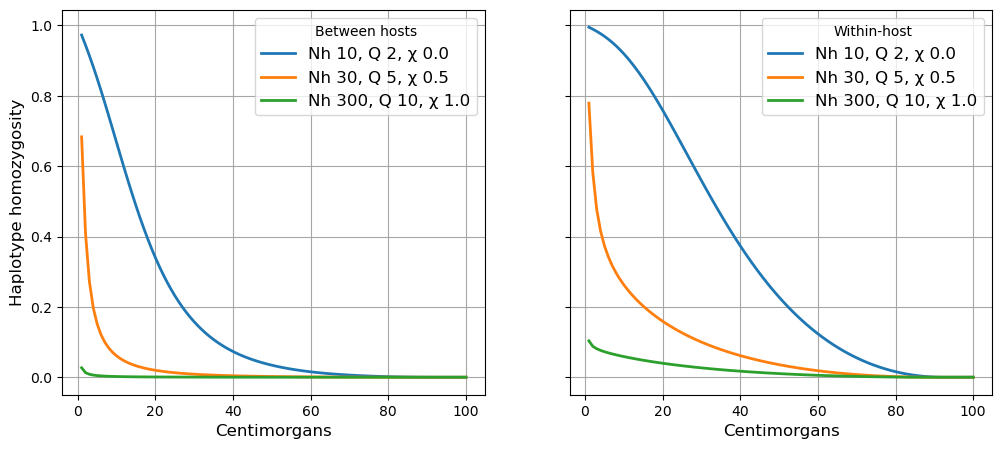

In [2]:
illustrative_histories = [
    [600, 10, 2, 0, 0],
    [1000, 30, 5, 0.5, 0],
    [10000, 300, 10, 1, 0]]

centimorgans = [x for x in range(1, 101)]   # range of haplotype lengths to be examined

fig, [a1, a2] = plt.subplots(1, 2, figsize = (12, 5), sharey = True)

for i,_ in enumerate(illustrative_histories):
    
    history = [illustrative_histories[i]]
    N = history[0][1]
    Q = history[0][2]
    X = history[0][3]
    
    my_pop = cs.Population(history)

    hap_length = []          # haplotype length in centimorgans
    beho_hap_hom = []        # between-host haplotype homozygosity
    wiho_hap_hom = []        # within-host haplotype homozygosity
    
    for j in range(len(centimorgans)):

        my_pop.get_coalescent(observe = 'auto', show = False)
        my_pop.locus_kb = centimorgans[j] * 13.5
        my_pop.get_diversity(show = False)
        
        hap_length.append(centimorgans[j])
        beho_hap_hom.append(my_pop.diversity[0, 3])   
        wiho_hap_hom.append(my_pop.diversity[0, 4])

    a1.plot(hap_length, beho_hap_hom, linewidth=2, label = 'Nh {0:.0f}, Q {1:.0f}, \u03C7 {2:.1f}'.format(N, Q, X))
    a2.plot(hap_length, wiho_hap_hom, linewidth=2, label = 'Nh {0:.0f}, Q {1:.0f}, \u03C7 {2:.1f}'.format(N, Q, X))
    
a1.set_xlabel("Centimorgans", fontsize=12)
a1.set_ylabel("Haplotype homozygosity", fontsize=12)
a1.legend(title = 'Between hosts', frameon=True, fontsize=12)
a1.grid(visible=True, which='both', color='0.65', linestyle='-')

a2.set_xlabel("Centimorgans", fontsize=12)
a2.legend(title = 'Within-host', frameon=True, fontsize=12)
a2.grid(visible=True, which='both', color='0.65', linestyle='-')

plt.show()

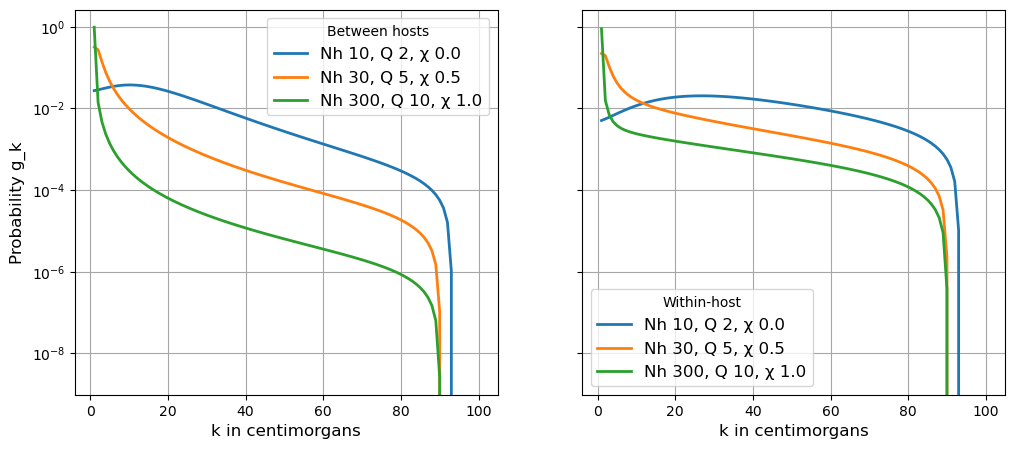

In [3]:
illustrative_histories = [
    [600, 10, 2, 0, 0],
    [1000, 30, 5, 0.5, 0],
    [10000, 300, 10, 1, 0]]

centimorgans = [x for x in range(1, 101)]   # range of haplotype lengths to be examined

fig, [a1, a2] = plt.subplots(1, 2, figsize = (12, 5), sharey = True)

for i,_ in enumerate(illustrative_histories):
    
    history = [illustrative_histories[i]]
    N = history[0][1]
    Q = history[0][2]
    X = history[0][3]
    
    my_pop = cs.Population(history)

    hap_interval = []        # haplotype length in centimorgans
    beho_hap_hom = []        # between-host haplotype homozygosity
    wiho_hap_hom = []        # within-host haplotype homozygosity
    beho_g = []
    wiho_g = []
    
    for j in range(len(centimorgans)):

        my_pop.get_coalescent(observe = 'auto', show = False)
        my_pop.locus_kb = centimorgans[j] * 13.5
        my_pop.get_diversity(show = False)
        
        hap_interval.append(centimorgans[j])
        beho_hap_hom.append(my_pop.diversity[0, 3])   
        wiho_hap_hom.append(my_pop.diversity[0, 4])
        
        if j != 0:
            beho_g.append(beho_hap_hom[-2] - beho_hap_hom[-1])
            wiho_g.append(wiho_hap_hom[-2] - wiho_hap_hom[-1])
        else:
            beho_g.append(1 - beho_hap_hom[-1])
            wiho_g.append(1 - wiho_hap_hom[-1])
        
    a1.plot(hap_interval, beho_g, linewidth=2, label = 'Nh {0:.0f}, Q {1:.0f}, \u03C7 {2:.1f}'.format(N, Q, X))
    a2.plot(hap_interval, wiho_g, linewidth=2, label = 'Nh {0:.0f}, Q {1:.0f}, \u03C7 {2:.1f}'.format(N, Q, X))
    
a1.set_xlabel("k in centimorgans", fontsize=12)
a1.set_ylabel("Probability g_k", fontsize=12)
a1.set_yscale("log")
a1.legend(title = 'Between hosts', frameon=True, fontsize=12)
a1.grid(visible=True, which='both', color='0.65', linestyle='-')

a2.set_xlabel("k in centimorgans", fontsize=12)
a2.set_yscale("log")
a2.legend(title = 'Within-host', frameon=True, fontsize=12)
a2.grid(visible=True, which='both', color='0.65', linestyle='-')

plt.show()